<a href="https://colab.research.google.com/github/drewbaraka/Movieproduction-analysis/blob/main/polynomial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


## OVERVIEW
# BACKGROUND INFORMATION
**Location**: King County is situated in the western part of Washington, USA and is known for being the most populous county in the state.
**Population**: The county has about 2.3 million residents, with two-thirds residing in the suburbs.

**Housing Data Analysis**
Dataset: The analysis is based on administrative data covering over 21,000 house sales that took place from May 2014 to May 2015 in King County.
Data Features: The dataset includes information on various aspects of homes such as prices, number of bedrooms, year of construction, and home conditions.
Housing Market: King County offers a diverse range of housing options including single-family homes, townhouses, condominiums, and apartments.

**Housing Varieties**
Single-family Homes: Ranging from historic to modern, these homes cater to different architectural and energy-efficient preferences.
Townhouses and Condominiums: These options are popular in urban areas like Seattle, providing a mix of affordability and convenience.

**Clientele**
Diverse Buyers: The county caters to a diverse range of buyers including first-time homebuyers, families, young professionals, and retirees.
Tech Influence: The presence of tech giants like Microsoft and Amazon in the county attracts a significant number of tech professionals, impacting the demand for upscale, modern homes.

#Analysis Objectives
The analysis on house sales in King County aims to achieve the following objectives:

*   Identify key features strongly correlated with price
*   Investigate the relationship between house size and price
*   Analyze how price correlates with the condition and grade of the houses
*   Explore the relationship between price and home features such as bedrooms and bathrooms + view
*   Identify the association between price and location


#Why?
These objectives aim to leverage data analysis and multiple regression modeling to provide valuable insights and recommendations for homeowners and real estate agencies, aiding in informed investment decisions.

#Business and Data Understanding
**Housing Affordability:**
The cost of housing in King County, particularly in areas like Seattle, has risen significantly, posing challenges for low and middle-income families.
Access to affordable housing options has become a pressing concern due to the increased cost of living.

**Shortage of Housing Units:**
The shortage of housing units has led to intense competition among buyers, as the housing supply struggles to keep up with the growing demand, resulting in rising property prices.

**Traffic Congestion:**
Urban areas in King County experience heavy traffic congestion, impacting commutes and accessibility.

**Climate Change Challenges:**
Climate change, including rising sea levels and extreme weather events, poses challenges for waterfront properties and requires careful consideration in real estate planning and development.

Solutions
**Proper Urban Planning:**
Government investment in good infrastructure and the establishment of systems like efficient public transportation can improve connectivity between residential areas and employment centers.

**Government Initiatives:**
Programs offering subsidies, partnerships with developers, and tax credits can incentivize the supply of affordable housing.

**Increasing Housing Supply:**
Streamlining permitting processes and zoning regulations can facilitate the construction of new housing units, encouraging mixed-use developments and exploring options for affordable housing on public land.

**Climate Change Mitigation:**
Promoting green building practices, protecting natural habitats, incorporating green spaces within urban areas, and implementing climate-resilient design standards can help address the challenges posed by climate change.

#DATA Cleaning and Preprocessing

In [4]:
#Importing relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn import metrics
from sklearn.inspection import permutation_importance
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest

In [5]:
#Data Loading
df = pd.read_csv('/content/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Detailed summary

id : A property identification number is a number assigned to parcels of real property by the tax assessor of a particular jurisdiction for purposes of identification and record keeping. date : Date of transaction

price : Price of house

bedrooms, bathrooms : Number

sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built

floors : Total floors in the house

waterfront: Whether the house is on a waterfront(1: yes, 0: no)

view : special view?

condition : Condition of the house

grade : Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.


sqft_above,sqft_basement : Square footage of house apart from basement and basement area

yr_built : Built year

yr_renovated : Year when the house was renovated

zipcode, lat, long : zip code, latitude and logtitude coordinate of the house

sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )

In [7]:
#checking for the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#checking for duplicates
df.duplicated().sum()

0

In [11]:
#checking for missing values
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [12]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
#create a new dataframe for cleaning

df2 = df.copy()

In [14]:
#replace the  missing value for waterfront with NO then change to binary value

df2.loc[df.waterfront.isnull(), 'waterfront'] = 'NO'
df2['waterfront'] = df2['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

In [15]:
#replace view missing value to NONE, then to numerical ordered values

df2.loc[df.view.isnull(), 'view'] = 'NONE'
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4 }
df2['view'].replace(view_dict, inplace = True)
#converting them to nuerical values helps us capture the ordinal nature of 'view' categories in predictive models.

In [16]:
#replace year renovated to 0 and add renovated column

df2.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0
df2['renovated'] = df2['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [17]:
#handling placehoders
#the sqft_basement has placeholders in the form of "?"
#we will add a basement column that is a binary value and replace the placeholder with 0

df2['sqft_basement'] = df2['sqft_basement'].replace('?', '0').astype('float')
df2['basement'] = df2['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

Justification

Handling the 'waterfront'
Replace the missing values with 'NO' since the missing values indicated

In [18]:
# Change to datetime and add month column

df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = pd.DatetimeIndex(df2['date']).month

# Change condition to numerical ordered values.

cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
df2['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical ordered values.

df2['grade'] = df2['grade'].map(lambda x: int(x.split(' ')[0]))

# Add house_age column

df2['age'] = df2['date'].dt.year - df2['yr_built']

In [19]:
(df2[df2['yr_renovated']==0].shape)[0]

20853

In [20]:
duplicate = df2[df2.duplicated(subset = 'id', keep = False)]
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,0.0,98117,47.6870,-122.386,1570,4500,0,1,7,75
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,0.0,98117,47.6870,-122.386,1570,4500,0,1,12,75
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,3,...,0.0,98006,47.5503,-122.102,3860,11244,0,1,6,17
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,0.0,98006,47.5503,-122.102,3860,11244,0,1,12,17
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,1984.0,98146,47.4957,-122.352,1820,7460,1,1,9,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,0.0,98045,47.4759,-121.734,2680,5992,0,0,3,2
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,0.0,98133,47.7076,-122.342,1130,1598,0,0,6,81
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,0.0,98133,47.7076,-122.342,1130,1598,0,0,5,82
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,0.0,98065,47.5184,-121.886,2850,6000,0,0,10,1


In [21]:
df2.drop_duplicates(subset = 'id', keep = 'first', inplace = True)
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,1,1,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,0,1,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,0,0,5,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,0,0,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,0,0,6,5
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,0,0,1,11


In [22]:
#we have 20680 houses that haven't been renovated which is 96% of the houses, thus we can drop the column yr_renovated
#we will also drop the id column as well
df2 = df2.drop(['id','yr_renovated'], axis = 1)
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,2,...,1955,98178,47.5112,-122.257,1340,5650,0,0,10,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,2,...,1951,98125,47.7210,-122.319,1690,7639,1,1,12,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,2,...,1933,98028,47.7379,-122.233,2720,8062,0,0,2,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,1965,98136,47.5208,-122.393,1360,5000,0,1,12,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,2,...,1987,98074,47.6168,-122.045,1800,7503,0,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,2,...,2009,98103,47.6993,-122.346,1530,1509,0,0,5,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,2,...,2014,98146,47.5107,-122.362,1830,7200,0,0,2,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,2,...,2009,98144,47.5944,-122.299,1020,2007,0,0,6,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,2,...,2004,98027,47.5345,-122.069,1410,1287,0,0,1,11


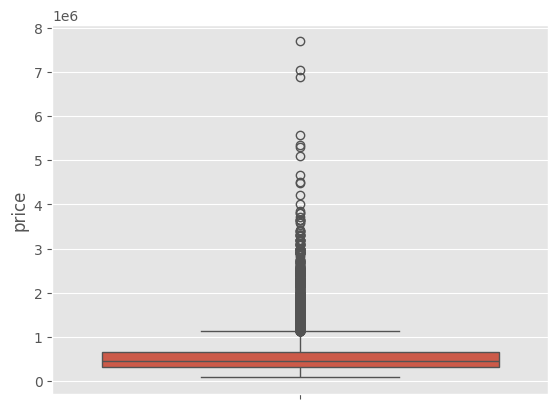

In [23]:
#handling outliers
#handling outliers in price
sns.boxplot(df2['price']);

In [24]:
#filter out the outliers in price
price_clean = df2[(df2.price < df2.price.quantile(.995))
                 & (df2.price > df2.price.quantile(.005))]

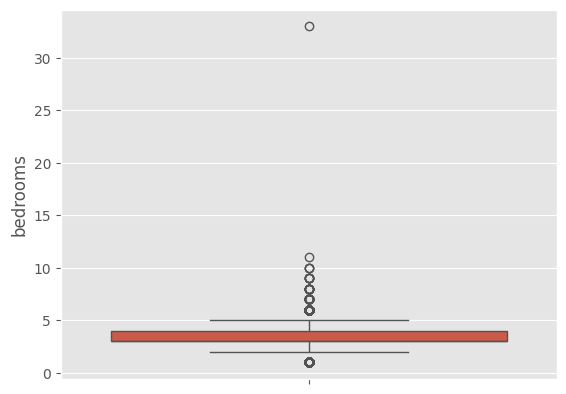

In [25]:
#handling outliers in bedroom
sns.boxplot(df2['bedrooms']);

In [26]:
#change the outlier figure in bedroom to 3 because it seems like a typing error
df2.loc[(df2.bedrooms == 33), 'bedrooms'] = 3


In [27]:
df2.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
count,21420,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,2014-10-28 05:03:51.932773120,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,2.410784,...,1971.092997,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,0.034547,0.385201,6.590336,43.225957
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,...,1900.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,1.000000,-1.000000
25%,2014-07-21 00:00:00,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,...,1952.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,4.000000,17.000000
50%,2014-10-15 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,2.000000,...,1975.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,0.000000,0.000000,6.000000,39.000000
75%,2015-02-13 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,3.000000,...,1997.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,0.000000,1.000000,9.000000,63.000000
max,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,...,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,12.000000,115.000000
std,NaN,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,...,29.387141,53.47748,0.138589,0.140791,685.537057,27345.621867,0.182634,0.486654,3.107924,29.387207


The data frame is now ready for use

# Exploratory Data Analysis

Visualisations and Insights

We will be performing analysis on the data frame to explore


*   Distribution of the various ZIPCODEs and the PRICE of the properties

*  Geographical distribution of the properties
*  A comparison of the continuous variables against price
*  How nominal values compare against price
* Correlation of the features of the properties









We look at

*   Distribution of the PRICE of the properties
*   Distribution of price by the various ZIPCODES


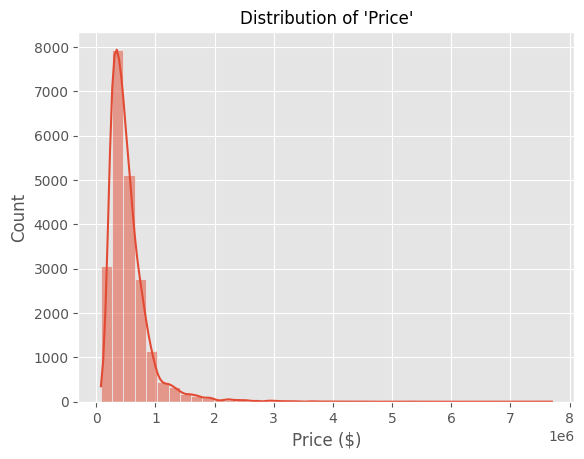

In [28]:
# Plotting the distribution of Price of the properties
sns.histplot(data=df2, x='price', bins=40, kde=True)
plt.title('Distribution of \'Price\'', fontsize=12)  # Setting the title
plt.xlabel('Price ($)')  # Setting the label for the X axis
plt.show()

Right skewed

It indicates that there are fewer high-priced houses and more low-priced houses.

**Analysis of relationship between Price and Zipcode**

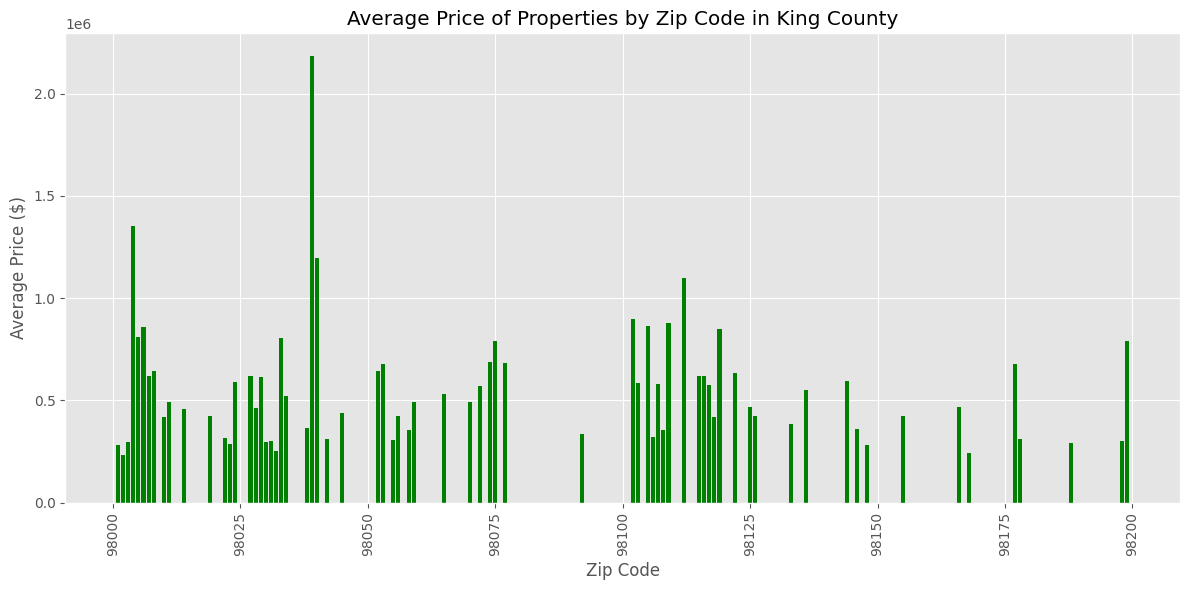

In [29]:
# Plotting the distribution of the properties by Zipcodes

# Group data by zip code and calculate the average price of properties in each zip code
avg_price_by_zip = df2.groupby('zipcode')['price'].mean().reset_index(name='average_price')

# Sort data by average price in descending order (optional)
avg_price_by_zip = avg_price_by_zip.sort_values(by='average_price', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_zip['zipcode'], avg_price_by_zip['average_price'], color='green')
plt.xlabel('Zip Code')
plt.ylabel('Average Price ($)')
plt.title('Average Price of Properties by Zip Code in King County')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [30]:
#Grouping the data by Zipcode to compute statistics for each Zipcode group.

zipcode_stats = df.groupby('zipcode')['price'].agg(['count', 'mean', 'median', 'std']) # Group the data by Zipcode and compute statistics

# Display the computed statistics
print(zipcode_stats)

         count          mean     median            std
zipcode                                               
98001      361  2.811949e+05   260000.0   98837.430520
98002      199  2.342840e+05   235000.0   52041.448659
98003      280  2.941113e+05   267475.0  107597.662236
98004      317  1.356524e+06  1150000.0  746094.067159
98005      168  8.102897e+05   765475.0  268979.168276
...        ...           ...        ...            ...
98177      255  6.764194e+05   554000.0  436379.739508
98178      262  3.106128e+05   278277.0  161044.746227
98188      136  2.890783e+05   264000.0  103106.579944
98198      280  3.028967e+05   265000.0  154906.277482
98199      317  7.921879e+05   689800.0  398428.721573

[70 rows x 4 columns]


In [31]:
# Calculate correlation between Zipcode and Price
correlation = df['zipcode'].corr(df['price'])

# Display the correlation coefficient
print("Correlation between Zipcode and Price:", correlation)

Correlation between Zipcode and Price: -0.05340243437772487


Zone the zipcodes, analyse prices by zone

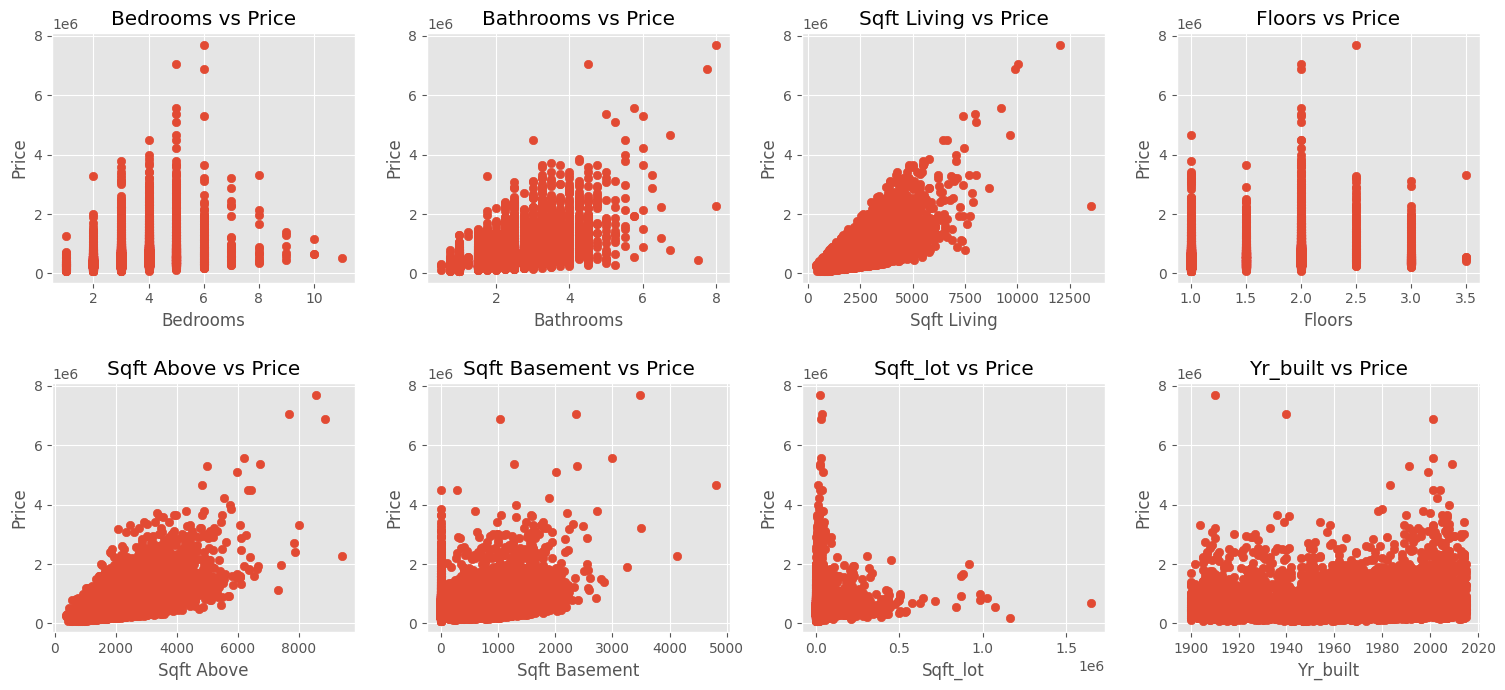

In [32]:
# Extract the independent variables (features) and dependent variable (price)
X = df2[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot','yr_built']]
y = df2['price']
fig, axs = plt.subplots(2, 4, figsize=(15, 7))  # 2 rows, 4 columns

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot each independent variable against the dependent variable
#for i in range(len(axs)):
    #axs[i].scatter(X.iloc[:, i], y)
    #axs[i].set_title(f'Independent Variable {i+1}')
    #axs[i].set_xlabel(f'X{i+1}')
    #axs[i].set_ylabel('Price')

column_titles = ['Bedrooms', 'Bathrooms', 'Sqft Living', 'Floors','Sqft Above', 'Sqft Basement', 'Sqft_lot', 'Yr_built']

# Plot each independent variable against the dependent variable
for i, ax in enumerate(axs):
    if i < len(X.columns):  # Check if the index is within the range of columns
        ax.scatter(X.iloc[:, i], y)
        ax.set_title(f'{column_titles[i]} vs Price')  # Set the title using column_titles list
        ax.set_xlabel(column_titles[i])  # Set the x-axis label using the column name
        ax.set_ylabel('Price')
plt.tight_layout()
plt.show()

The price of properties has a strong positive correlation with the number of bathrooms, square foot living area and square foot above.

The price is therefore heavily dependent on these 3 house attributes.

# Feature Selection and Engineering

In this section, we shall explore the correclations between various features and our target value (price)

**Analysis of the average price for each category of a nominal variable ('waterfront', 'view', 'condition', 'grade')**

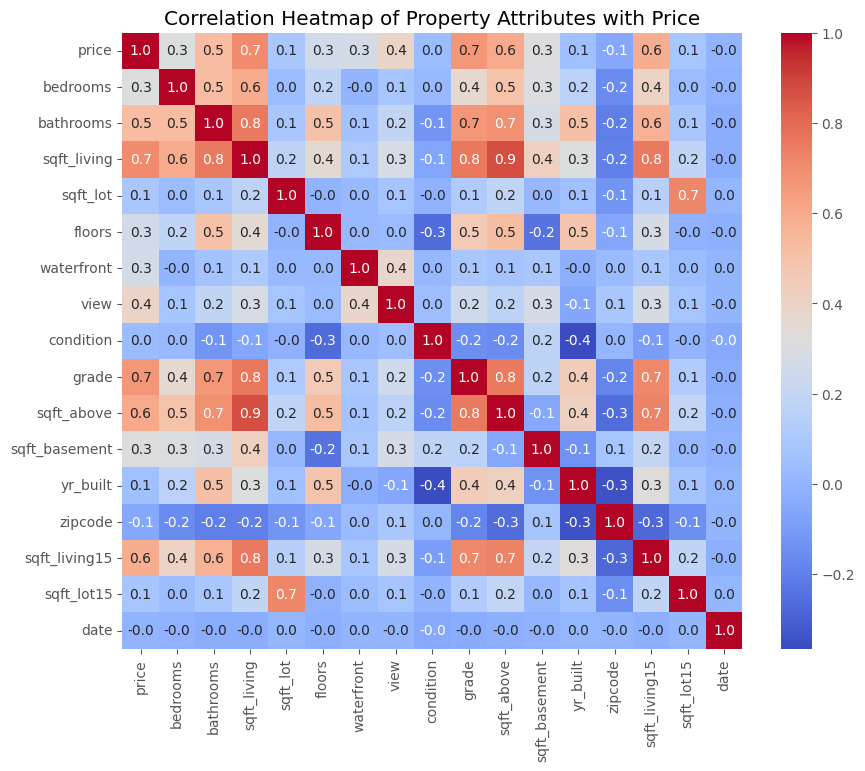

In [33]:
# Select relevant columns for analysis (property attributes and price)
columns_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                      'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                      'yr_built', 'zipcode','sqft_living15', 'sqft_lot15', 'date']
df_selected = df2[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a mask to hide the upper triangular part of the heatmap
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Property Attributes with Price')
plt.show()

Sqft_living, grade, Sqft above, sqft living 15 and bathrooms have the highest correlation with price respectively.

# Hypothesis



1.   There is a relationship between Square foot living and Price. The Null hypothesis is that there is no relationship and the alternative is true.
2.   The grade of the house determines the price its listed at. The Null Hypothesis is that grade does not determine the price whilst the alternative is true.
3.   Houses with more bathrooms are listed at higher prices. The Null hypothesis is that houses with more bathrooms are not listed at higher prices whilst the alternative is true.





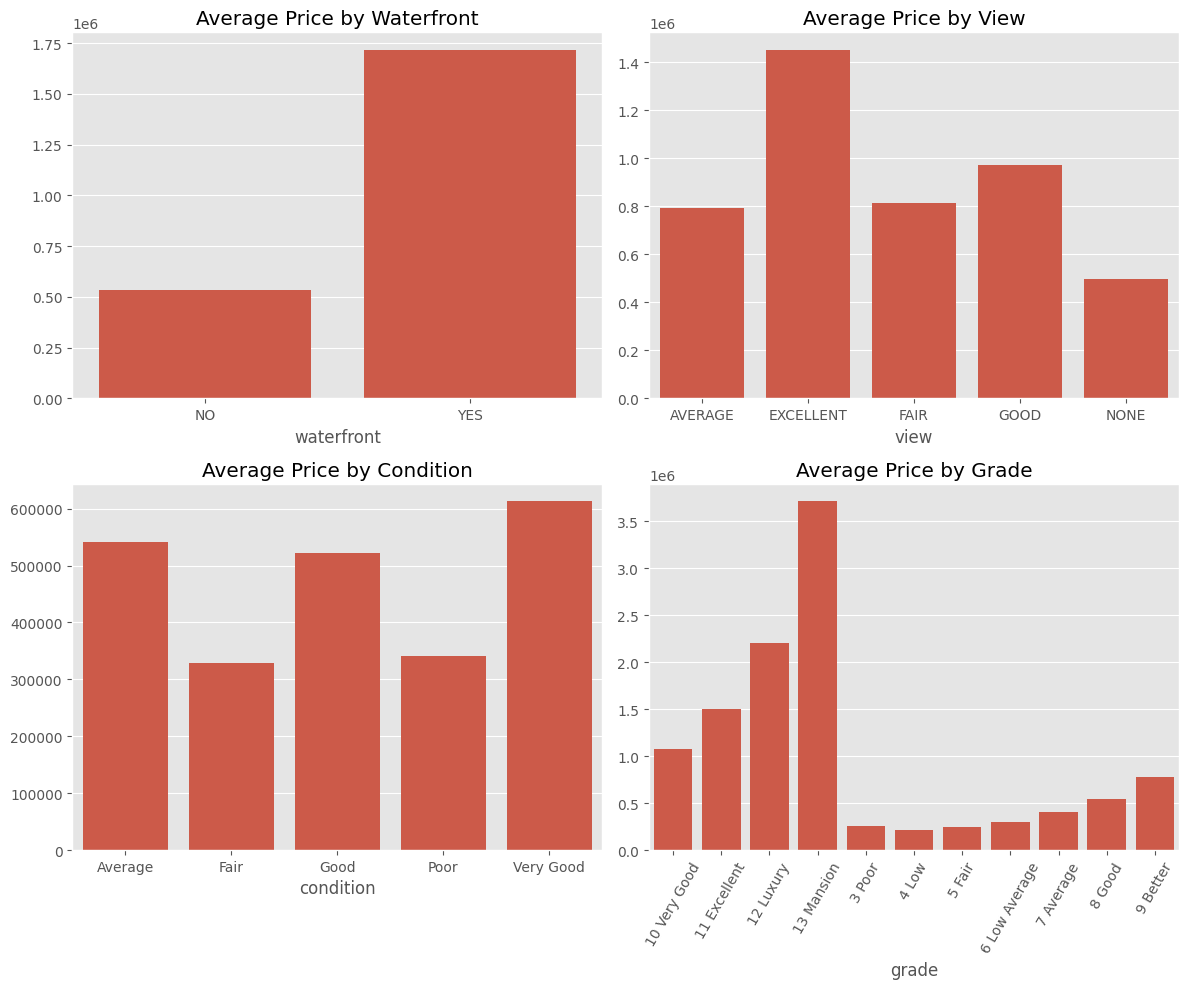

In [34]:
#Exploring relationships between categorical variables with price
# Calculate the mean price for each category of the categorical variables
mean_price_by_waterfront = df.groupby('waterfront')['price'].mean()
mean_price_by_view = df.groupby('view')['price'].mean()
mean_price_by_condition = df.groupby('condition')['price'].mean()
mean_price_by_grade = df.groupby('grade')['price'].mean()

# Plot bar plots for each categorical variable against the average price
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x=mean_price_by_waterfront.index, y=mean_price_by_waterfront.values, ax=axs[0, 0])
axs[0, 0].set_title('Average Price by Waterfront')

sns.barplot(x=mean_price_by_view.index, y=mean_price_by_view.values, ax=axs[0, 1])
axs[0, 1].set_title('Average Price by View')

sns.barplot(x=mean_price_by_condition.index, y=mean_price_by_condition.values, ax=axs[1, 0])
axs[1, 0].set_title('Average Price by Condition')

sns.barplot(x=mean_price_by_grade.index, y=mean_price_by_grade.values, ax=axs[1, 1])
axs[1, 1].set_xticks(range(len(mean_price_by_grade.index)))
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=60)
axs[1, 1].set_title('Average Price by Grade')


plt.tight_layout()
plt.show()

Properties with a waterfront are valued higher than properties without.

Best views translate to higher property values.

Properties in good condition are valued higher.
However, properties in poor conditions are priced higher than those in fair condition.



In [35]:
print(df2.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'basement', 'month', 'age'],
      dtype='object')


From the data set we look at the sales per month

In [36]:
#Analysing Month as a new feature to check on which period in the year are most houses sold.
df2['month'].value_counts()

month
5     2398
7     2211
4     2187
6     2178
8     1936
10    1870
3     1835
9     1770
12    1454
11    1401
2     1220
1      960
Name: count, dtype: int64

May has the most number of houses sold.
Q2 and Q3 has the highest number of units sold.

# Regression

Assumptions for linear regression


1.   Homoscedasciticity - the difference between the observed and predicted values are similar
2.   Linearity - the relationship between X and Y is linear
3.   Independence - the observations are independent of each other
2.   Normality -  the data follows a normal distribution





In [37]:
#sqft_living has the highest correlation with price thus we can derive a linear regression model
#Defining x and y
X = df2['sqft_living']
y = df2['price']

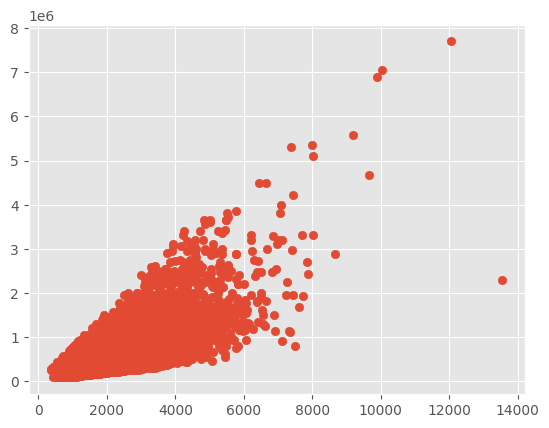

In [38]:
#plotting a scatter graph to check for distribution
plt.scatter(X, y)

In [39]:
#calculating the slope for linear regression line
def calc_slope(x_vals, y_vals):
    rho = np.corrcoef(x_vals, y_vals)[0][1]
    s_y = y_vals.std()
    s_x = x_vals.std()

    m = rho * s_y / s_x
    return m

m = calc_slope(X,y)
m

281.0615698705318

In [40]:
#deriving the constant -  y-intercept
def calc_intercept(m, x_vals, y_vals):
    y_mean = y_vals.mean()
    x_mean = x_vals.mean()

    c = y_mean - m * x_mean
    return c

c = calc_intercept(m, X, y)
c

-44749.224172904156

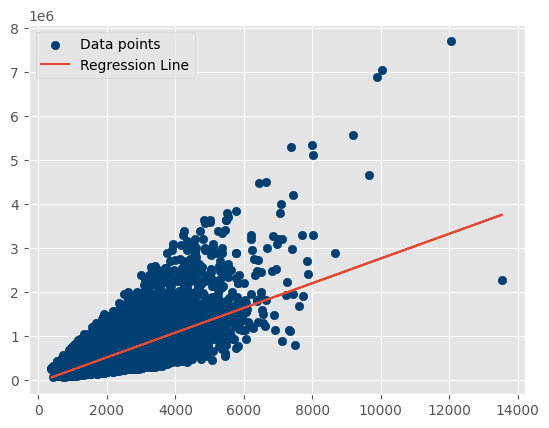

In [41]:
#Plotting the line of best fit
def best_fit(x_vals, y_vals):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x_vals, y_vals, color='#003F72', label="Data points")

    # Calculate and print coefficient and intercept
    m = calc_slope(x_vals, y_vals)
    c = calc_intercept(m, x_vals, y_vals)

    # Plot line created by coefficient and intercept
    regression_line = m *x_vals + c
    ax.plot(x_vals, regression_line, label="Regression Line")
    ax.legend()

best_fit(X, y)

In [42]:
#Model selection and intro
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [43]:
#Extraction of model fitness
results = model.fit()
results

In [44]:
#To print the model results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:08:21   Log-Likelihood:            -2.9764e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.475e+04   4437.427    -10.084      

Sqft - living accounts for 49.3% of the price. The P-Value are positive which means sqft living has a significant relationship with price. The f-statistic is at 2.080e+04 which is very high and with the p-value at zero, sqft living is a good predictor of price thus the model is doing a good job thus reject the null hypothesis.

An additional square foot raises an additional value in price by $281 according to the single variable regression.

However, sqft living alone cannot explain the whole price, just 49% and not sufficient. We need multiple variables to explain price.

#Identifying Multicollinearity

The main goal is to identify the relationship between each predictor and price. Collinearity indicates that changes in one independent variable are associated with changes in another independent variable. We are about to unveil the relationships in our preditors i.e independent variables and remove or accommodate any that are highly correlated with others.

In [45]:
# Let's choose 'sqft_living', 'grade', 'sqft_above','sqft_living15','bathrooms','view'

x = df2[['bathrooms','sqft_living','view', 'grade', 'sqft_above','sqft_living15',]]
y = df2['price']

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(x, y)

LinearRegression()

In [48]:
#r2 score
lr.score(x, y)

0.5757531229835862

In [49]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=6)

In [50]:
ss = StandardScaler()
ss.fit(df2.drop(['price','date'], axis=1))


df2_scaled =ss.transform(df2.drop(['price','date'], axis=1))

In [51]:
select.fit(X=df2_scaled, y=df2['price'])

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [52]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'basement', 'month', 'age'],
      dtype='object')

In [53]:
select.support_

array([False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True])

We shall use the suggested predictors to train the linear regression model on the relationships between them and price.

suggested features are


  
*   sqft_living
*   waterfront
*   grade
*   latitude
*   Age


In [54]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'basement', 'month', 'age'],
      dtype='object')

In [55]:
#Selecting the independent variables to use in our model
x = df2[['sqft_living', 'waterfront','grade', 'lat','age']]
y = df2[['price']]

#Model Training

In [56]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [57]:
#Importing and training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 16065
Test set size: 5355


In [59]:
#Results from the trained data
model = sm.OLS(y_train, x_train)
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          2.421e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:08:21   Log-Likelihood:                     -2.2074e+05
No. Observations:               16065   AIC:                                  4.415e+05
Df Residuals:                   16060   BIC:                                  4.415e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   170.6209      2.969     57.471      0.000     164.802     176.440
waterfront   7.883e+05   2.15e+04     36.603      0.000    7.46e+05    8.31e+05
grade        1.416e+05   2475.138     57.212      0.000    1.37e+05    1.46e+05
lat         -2.223e+04    348.810    -63.724      0.000   -2.29e+04   -2.15e+04
age          3512.9235     68.105     51.581      0.000    3379.430    3646.418
==============================================================================
Omnibus:                    12868.230   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1071836.688
Skew:                           3.285   Prob(JB):                         0.00
Kurtosis:                      42.473   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#Model Predictions
y_test_pred = lm.predict(x_test)

#Evaluate the model's performance on the training set
from sklearn import metrics
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("Testing Mean Squared Error:", test_mse)
print("Testing Mean Absolute Error:", test_mae)
print("Testing R-squared:", test_r2)

Testing Mean Squared Error: 42423294224.50852
Testing Mean Absolute Error: 132391.57001667857
Testing R-squared: 0.676402118056104


In [61]:
#Results from the test data
model = sm.OLS(y_test, x_test)
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              8168.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:08:21   Log-Likelihood:                         -73488.
No. Observations:                5355   AIC:                                  1.470e+05
Df Residuals:                    5350   BIC:                                  1.470e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   177.0102      5.208     33.990      0.000     166.801     187.219
waterfront    7.77e+05   3.79e+04     20.527      0.000    7.03e+05    8.51e+05
grade        1.371e+05   4323.532     31.702      0.000    1.29e+05    1.46e+05
lat         -2.169e+04    606.392    -35.771      0.000   -2.29e+04   -2.05e+04
age          3453.8117    114.031     30.288      0.000    3230.265    3677.358
==============================================================================
Omnibus:                     2823.241   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63981.871
Skew:                           2.031   Prob(JB):                         0.00
Kurtosis:                      19.439   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

POLYNOMIAL REGRESSION

Polynomial Model (Degree 2)- MSE: 57824075249.65792
Polynomial Model (Degree 2)- R_squared: 0.522495501498599


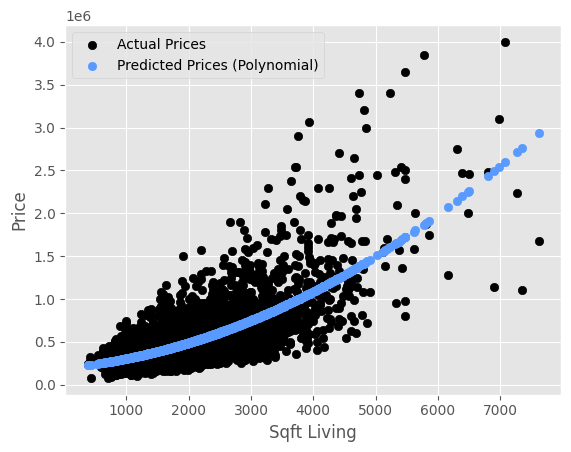

In [79]:
#relevant features
features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

#filter
filter = df2[features]

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

#polynomial regression
#select the polynomial degree
degree = 2

#polynomial features
poly = PolynomialFeatures(degree)
import numpy as np
x_train_reshaped = x_train.values.reshape(-1,1)
x_train_poly = poly.fit_transform(x_train_reshaped)
x_test_reshaped = x_test.values.reshape(-1,1)
x_test_poly = poly.transform(x_test_reshaped)

#build a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

#predictions on the test set
y_pred_poly = poly_model.predict(x_test_poly)

#evaluate the poly model
from sklearn.metrics import mean_squared_error
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = metrics.r2_score(y_test, y_pred_poly)
print("Polynomial Model (Degree {})- MSE:".format(degree), mse_poly)
print("Polynomial Model (Degree {})- R_squared:".format(degree), r2_poly)

#visualize the results
plt.scatter(x_test, y_test, color='black', label='Actual Prices')
plt.scatter(x_test, y_pred_poly,color='#589aff', label='Predicted Prices (Polynomial)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()